<a href="https://colab.research.google.com/github/MeerkatCode589/Project/blob/main/sentimentanalysis_netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q transformers tweepy wordcloud matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Read the CSV file with the appropriate encoding
file_path = '/content/tweets_with_sentiment.csv'



In [ ]:
netflixsentiment_df = pd.read_csv(file_path)

In [ ]:
netflixsentiment_df.head(10)

,username,tweets,query,timestamp,tokenized_tweets,sentiment,score
0,@abuaardvark,nobody tell the egyptian netflix s queen cleopatra haters that egypt has a nice little corner in senegal s museum of black civilization it is a nice museum,https://twitter.com/search?f=live&q=cleopatra%20black%20lang%3Aen&src=typed_query since:2022-01-01 lang:en @Netflix Cleopatra,30-06-2023 14:01:00,nobody tell egyptian netflix queen cleopatra haters egypt nice little corner senegal museum black civilization nice museum,NEU,0.644343
1,@JerrellZod,clickbait i will say it again i do not have a problem with gal being cleopatra i love my people but cleopatra was not black there were black pharaohs that hollywood refuses to tell stories about egypt tries to omit but embrace every other invader colonizer who became pharaohs,https://twitter.com/search?f=live&q=cleopatra%20black%20lang%3Aen&src=typed_query since:2022-01-01 lang:en @Netflix Cleopatra,30-06-2023 13:56:00,clickbait say problem gal cleopatra love people cleopatra black black pharaohs hollywood refuses tell stories egypt tries omit embrace every invader colonizer became pharaohs,NEU,0.757949
2,@Champion2DRob,but cleopatra is black jada pinket told me so,https://twitter.com/search?f=live&q=cleopatra%20black%20lang%3Aen&src=typed_query since:2022-01-01 lang:en @Netflix Cleopatra,30-06-2023 13:39:00,cleopatra black jada pinket told,NEU,0.955307
3,@rotterr1,oh so racist comment xd if cleopatra was black then napoleon also,https://twitter.com/search?f=live&q=cleopatra%20black%20lang%3Aen&src=typed_query since:2022-01-01 lang:en @Netflix Cleopatra,30-06-2023 13:36:00,oh racist comment xd cleopatra black napoleon also,NEG,0.897287
4,@TheTrueEvilNick,egyptian people looked then like they look now middle eastern it was not a black empire cleopatra was tech greek tech there are no large scale black empires through history that have any written proof zulu nation is prob the closest there is,https://twitter.com/search?f=live&q=cleopatra%20black%20lang%3Aen&src=typed_query since:2022-01-01 lang:en @Netflix Cleopatra,30-06-2023 13:31:00,egyptian people looked like look middle eastern black empire cleopatra tech greek tech large scale black empires history written proof zulu nation prob closest,NEU,0.927340
5,@qwerty14117587,netflix s queen cleopatra completely rewrites history ekathimerini com opinion int,https://twitter.com/search?f=live&q=netflix%2C%20cleopatra%20lang%3Aen&src=typed_query since:2022-01-01 lang:en @Netflix Cleopatra,30-06-2023 13:17:00,netflix queen cleopatra completely rewrites history ekathimerini com opinion int,NEU,0.511130
6,@PaulEalyMooney,be reminded paul mooney jesus was black so was cleopatra of invidious projectsegfau lt ectdnesvsje via youtube,https://twitter.com/search?f=live&q=cleopatra%20black%20lang%3Aen&src=typed_query since:2022-01-01 lang:en @Netflix Cleopatra,30-06-2023 12:43:00,reminded paul mooney jesus black cleopatra invidious projectsegfau lt ectdnesvsje via youtube,NEU,0.968382
7,@Edwardelrich9,why would netflix buy such trash they are already dealing with the black cleopatra scandal and now they would have to deal with crazy snyder fans,https://twitter.com/search?f=live&q=netflix%2C%20cleopatra%20lang%3Aen&src=typed_query since:2022-01-01 lang:en @Netflix Cleopatra,30-06-2023 12:16:00,would netflix buy trash already dealing black cleopatra scandal would deal crazy snyder fans,NEG,0.973517
8,@hdicky5,no one can re write history queen cleopatra is not black she is greek and will remain greek for ever greek skin tone can range from cream to light brown to moderate brown and tans easily it can also have yellowish olive or golden undertones,https://twitter.com/search?f=live&q=cleopatra%20black%20lang%3Aen&src=typed_query since:2022-01-01 lang:en @Netflix Cleopatra,30-06-2023 11:04:00,one write history queen cleopatra black greek remain greek ever greek skin tone range cream light brown moderate brown tans easily also yellowish olive golden undertones,NEU,0.806947
9,@e

In [ ]:
from transformers import pipeline

# Set up the inference pipeline using a model from the 🤗 Hub
sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

# run the sentiment analysis on each tweet
tweets = []

for tweet in netflixsentiment_df:
    try:
        content = tweet.full_text
        sentiment = sentiment_analysis(content)
        tweets.append({'tweet': content, 'sentiment': sentiment[0]['label']})
    except:
        pass


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [ ]:
import pandas as pd

# Load the data in a dataframe
df = pd.DataFrame(netflixsentiment_df)
pd.set_option('display.max_colwidth', None)

# Show a tweet for each sentiment
display(df[df["sentiment"] == 'POS'].head(1))
display(df[df["sentiment"] == 'NEU'].head(1))
display(df[df["sentiment"] == 'NEG'].head(1))


,username,tweets,query,timestamp,tokenized_tweets,sentiment,score
9,@ekathimerini,netflix s queen cleopatra completely rewrites history dlvr it srspmq,https://twitter.com/search?f=live&q=netflix%2C%20cleopatra%20lang%3Aen&src=typed_query since:2022-01-01 lang:en @Netflix Cleopatra,30-06-2023 08:38:00,netflix queen cleopatra completely rewrites history dlvr srspmq,POS,0.86986


,username,tweets,query,timestamp,tokenized_tweets,sentiment,score
0,@abuaardvark,nobody tell the egyptian netflix s queen cleopatra haters that egypt has a nice little corner in senegal s museum of black civilization it is a nice museum,https://twitter.com/search?f=live&q=cleopatra%20black%20lang%3Aen&src=typed_query since:2022-01-01 lang:en @Netflix Cleopatra,30-06-2023 14:01:00,nobody tell egyptian netflix queen cleopatra haters egypt nice little corner senegal museum black civilization nice museum,NEU,0.644343


,username,tweets,query,timestamp,tokenized_tweets,sentiment,score
3,@rotterr1,oh so racist comment xd if cleopatra was black then napoleon also,https://twitter.com/search?f=live&q=cleopatra%20black%20lang%3Aen&src=typed_query since:2022-01-01 lang:en @Netflix Cleopatra,30-06-2023 13:36:00,oh racist comment xd cleopatra black napoleon also,NEG,0.897287


In [ ]:
# Calculate sentiment value counts
sentiment_counts = netflixsentiment_df['sentiment'].value_counts()

# Print the sentiment counts
print("Sentiment Counts:")
print(sentiment_counts)

Sentiment Counts:
NEU    9749
NEG    9385
POS    1050
Name: sentiment, dtype: int64


In [ ]:
import pandas as pd


negative_keywords = ['bad', 'woke', 'not good', 'spoil', 'identity', 'forced', 'change', 'rotten tomatoes', 'not true', 'virtue signal', 'fake', 'lies', 'fucked', 'disrespectful', 'black lives matter', 'rewrite', 'purposefully', 'propaganda', 'wokeness', 'broke','gowokegobroke', 'appropriation', 'erase', 'inaccurate', 'lawsuit', 'black lives matter', 'ariel', 'mess', 'trap', 'woke mob', 'porn', 'fake', 'loss', 'changed', 'inaccurate', 'poor', 'liberals', 'left', 'liberal', 'flop', 'controversy', 'terrible', 'problem', 'bias', 'diversity', 'worse', 'agenda', 'swap', 'race', 'esg', 'dei', 'cancel', 'blm', 'mermaid', 'political', 'casting', 'disappointed', 'unhappy', 'terrible', 'awful']


for index, row in netflixsentiment_df.iterrows():
    tweet = row['tweets']
    if any(keyword in tweet for keyword in negative_keywords):
        netflixsentiment_df.loc[index, 'sentiment'] = 'NEG'


sentiment_counts = netflixsentiment_df['sentiment'].value_counts()

# Print the sentiment counts
print("Updated Sentiment Counts:")
print(sentiment_counts)


Updated Sentiment Counts:
NEG    12242
NEU     7140
POS      802
Name: sentiment, dtype: int64


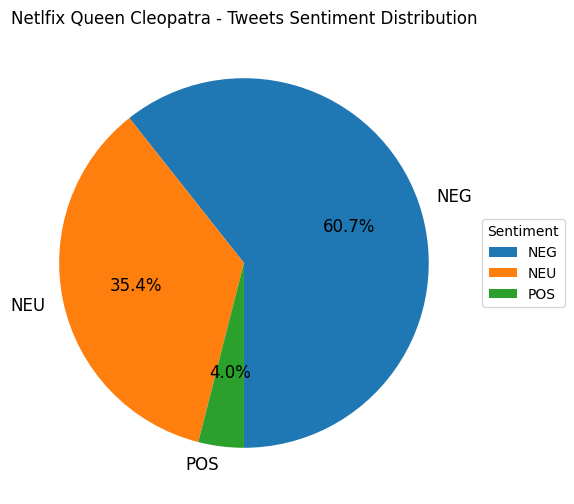

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


sentiment_counts = netflixsentiment_df['sentiment'].value_counts()


fig = plt.figure(figsize=(6, 6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

# Add labels
ax.legend(labels=sentiment_counts.index, title='Sentiment', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Netlfix Queen Cleopatra - Tweets Sentiment Distribution')
plt.ylabel('')

# Save the pie chart as a PNG file
plt.savefig('sentiment_pie_chart.png', dpi=300)

# Show the pie chart
plt.show()



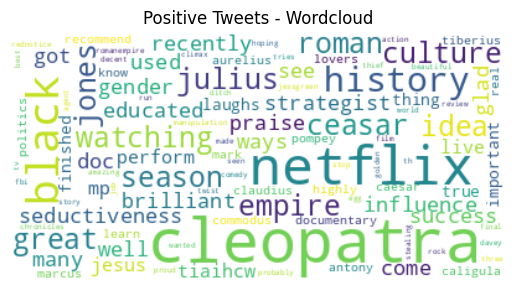

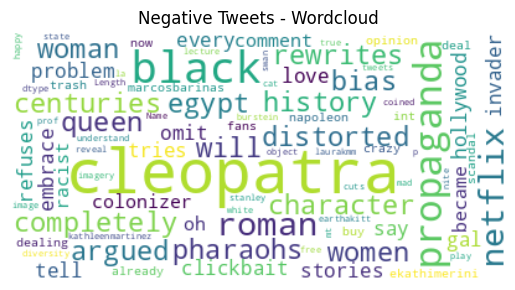

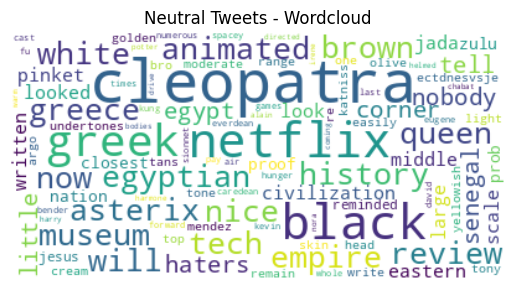

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


unwanted_words = ['projectsegfau', 'watch', 'jyg', 'mooney','zjvq', 'roberts', 'paul', 'lt', 'v', 'dlvr', 'cal', 's', 'rudj', 'ede', 'told', 'srspmq', 'xd', 'said', 'invidious', 'people', 'com', 'x', 'series', 'let', 'would', 'via', 'alone', 'los', 'youtube', 'snyder', 'kathleen', 'ly']

# Wordcloud with positive tweets
positive_tweets = netflixsentiment_df['tweets'][netflixsentiment_df["sentiment"] == 'POS']
stop_words = ["https", "co", "RT"] + list(STOPWORDS) + unwanted_words
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('positive_wordcloud.png', dpi=300)  # Save the positive wordcloud as a PNG file
plt.show()

# Wordcloud with negative tweets
negative_tweets = netflixsentiment_df['tweets'][netflixsentiment_df["sentiment"] == 'NEG']
stop_words = ["https", "co", "RT"] + list(STOPWORDS) + unwanted_words
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('negative_wordcloud.png', dpi=300)  # Save the negative wordcloud as a PNG file
plt.show()

# Wordcloud with neutral tweets
neutral_tweets = netflixsentiment_df['tweets'][netflixsentiment_df["sentiment"] == 'NEU']
stop_words = ["https", "co", "RT"] + list(STOPWORDS) + unwanted_words
neutral_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stop_words).generate(str(neutral_tweets))
plt.figure()
plt.title("Neutral Tweets - Wordcloud")
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('neutral_wordcloud.png', dpi=300)  # Save the neutral wordcloud as a PNG file
plt.show()

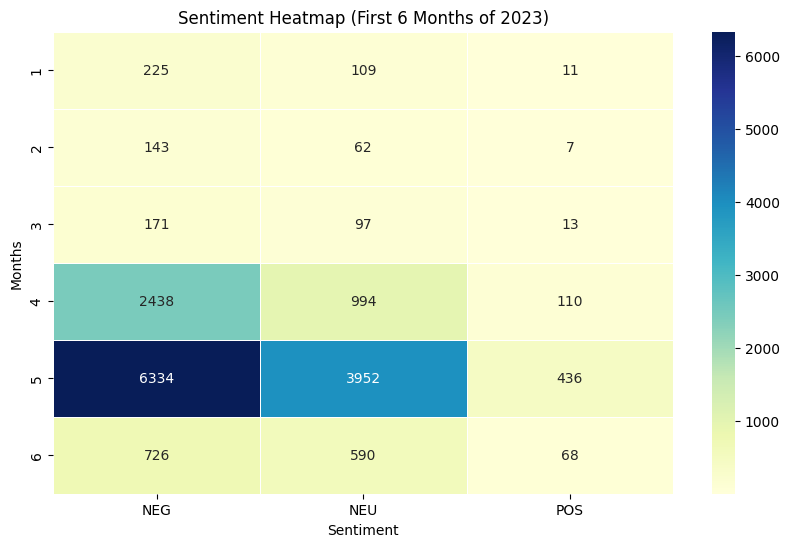

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Convert the 'timestamp' column to a datetime type
netflixsentiment_df['timestamp'] = pd.to_datetime(netflixsentiment_df['timestamp'])


filtered_netflixsentiment_df = netflixsentiment_df[(netflixsentiment_df['timestamp'].dt.year == 2023) & (netflixsentiment_df['timestamp'].dt.month <= 6)]

# Sentiment Heatmap
sentiment_counts = filtered_netflixsentiment_df['sentiment'].value_counts()

# Create a pivot table with counts of each sentiment by month
sentiment_pivot = pd.pivot_table(filtered_netflixsentiment_df, index=filtered_netflixsentiment_df['timestamp'].dt.month, columns='sentiment', aggfunc='size', fill_value=0)

# Sort months in chronological order
sentiment_pivot = sentiment_pivot.sort_index()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sentiment_pivot, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Sentiment Heatmap (First 6 Months of 2023)')
plt.xlabel('Sentiment')
plt.ylabel('Months')
plt.show()



# Save the heatmap plot as a PNG file
fig.savefig('heatmap_plot.png', dpi=300)


In [ ]:
import matplotlib.pyplot as plt


# Save the heatmap plot as a PNG file
fig.savefig('heatmap_plot.png', dpi=300)

# Save the heatmap plot as a JPEG file with a higher quality (optional)
fig.savefig('heatmap_plot.jpg', dpi=600)